In [1]:
import cv2
import os
import pandas as pd
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

In [2]:
mp_face_mesh = mp.solutions.face_mesh

In [14]:
cols = []
for point in range(39):
    for num in ("x", "y", "z"):
        cols.append("p" + "%02d" % point + "_" + num)
cols = cols + ["label"]

# 1) Drowsy.csv

In [18]:
drowsy_path = ("../../../Driver Drowsiness Dataset (DDD)/Drowsy/")
drowsy_files = os.listdir(drowsy_path)
drowsy_coord = pd.DataFrame(columns=cols)
drowsy_coord

,p00_x,p00_y,p00_z,p01_x,p01_y,p01_z,p02_x,p02_y,p02_z,p03_x,...,p36_x,p36_y,p36_z,p37_x,p37_y,p37_z,p38_x,p38_y,p38_z,label


In [19]:
with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    for index, file_name in enumerate(drowsy_files):
        image = cv2.imread(drowsy_path + file_name)

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            fls = results.multi_face_landmarks[0]
            point_list = [fls.landmark[46], fls.landmark[53], fls.landmark[52], fls.landmark[55], fls.landmark[65],
                          
                          fls.landmark[276], fls.landmark[283], fls.landmark[282], fls.landmark[295], fls.landmark[285],
                          
                          fls.landmark[130], fls.landmark[160], fls.landmark[158], fls.landmark[133], fls.landmark[153], fls.landmark[144],
                          
                          fls.landmark[359], fls.landmark[387], fls.landmark[385], fls.landmark[362], fls.landmark[380], fls.landmark[373],
                          
                          fls.landmark[168], fls.landmark[6], fls.landmark[195], fls.landmark[4],
                          
                          fls.landmark[61],  fls.landmark[39], fls.landmark[0], fls.landmark[269], fls.landmark[291], fls.landmark[405], fls.landmark[17], fls.landmark[181],

                          fls.landmark[234], fls.landmark[132], fls.landmark[152], fls.landmark[288], fls.landmark[454]]
            
            temp = []
            for i, points in enumerate(point_list):
                temp.append(points.x)
                temp.append(points.y)
                temp.append(points.z)
            temp.append(1)
            
            drowsy_coord.loc[index] = temp
            if index % 100 == 0:
                print(index)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [20]:
drowsy_coord.to_csv('./drowsy_39_Points.csv', index=False, encoding='utf-8-sig')

# 2) Non-Drowsy.csv

In [21]:
non_drowsy_path = ("../../../Driver Drowsiness Dataset (DDD)/Non Drowsy/")
non_drowsy_files = os.listdir(non_drowsy_path)
non_drowsy_coord = pd.DataFrame(columns=cols)
non_drowsy_coord

,p00_x,p00_y,p00_z,p01_x,p01_y,p01_z,p02_x,p02_y,p02_z,p03_x,...,p36_x,p36_y,p36_z,p37_x,p37_y,p37_z,p38_x,p38_y,p38_z,label


In [22]:
with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    for index, file_name in enumerate(non_drowsy_files):
        image = cv2.imread(non_drowsy_path + file_name)

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            fls = results.multi_face_landmarks[0]
            point_list = [fls.landmark[46], fls.landmark[53], fls.landmark[52], fls.landmark[55], fls.landmark[65],
                          
                          fls.landmark[276], fls.landmark[283], fls.landmark[282], fls.landmark[295], fls.landmark[285],
                          
                          fls.landmark[130], fls.landmark[160], fls.landmark[158], fls.landmark[133], fls.landmark[153], fls.landmark[144],
                          
                          fls.landmark[359], fls.landmark[387], fls.landmark[385], fls.landmark[362], fls.landmark[380], fls.landmark[373],
                          
                          fls.landmark[168], fls.landmark[6], fls.landmark[195], fls.landmark[4],
                          
                          fls.landmark[61],  fls.landmark[39], fls.landmark[0], fls.landmark[269], fls.landmark[291], fls.landmark[405], fls.landmark[17], fls.landmark[181],

                          fls.landmark[234], fls.landmark[132], fls.landmark[152], fls.landmark[288], fls.landmark[454]]
            
            temp = []
            for i, points in enumerate(point_list):
                temp.append(points.x)
                temp.append(points.y)
                temp.append(points.z)
            temp.append(0)
            
            non_drowsy_coord.loc[index] = temp
            if index % 100 == 0:
                print(index)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [23]:
non_drowsy_coord.to_csv('./non-drowsy_39_Points.csv', index=False, encoding='utf-8-sig')

# 3) 모델 학습

In [35]:
from sklearn.preprocessing import LabelEncoder

df = pd.concat([drowsy_coord, non_drowsy_coord])
df = df.sample(frac=1).reset_index(drop=True)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33433, 117), (8359, 117), (33433, 2), (8359, 2))

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(64,input_shape=(117,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 0, mode = 'auto')


model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                7552      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 2)                 130       
                                                                 
Total params: 16,002
Trainable params: 16,002
Non-trainable params: 0
_________________________________________________________________


In [38]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250)

Epoch 1/250
1045/1045 [==============================] - 3s 2ms/step - loss: 0.6478 - accuracy: 0.5953 - val_loss: 0.5955 - val_accuracy: 0.6436
Epoch 2/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.5610 - accuracy: 0.6841 - val_loss: 0.5056 - val_accuracy: 0.7283
Epoch 3/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.4909 - accuracy: 0.7481 - val_loss: 0.4313 - val_accuracy: 0.8251
Epoch 4/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.4476 - accuracy: 0.7810 - val_loss: 0.4464 - val_accuracy: 0.7872
Epoch 5/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.4173 - accuracy: 0.8012 - val_loss: 0.4189 - val_accuracy: 0.8060
Epoch 6/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.3942 - accuracy: 0.8151 - val_loss: 0.4145 - val_accuracy: 0.7911
Epoch 7/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.3735 - accuracy: 0.8285 - val_loss: 0.3515 - val_ac

1045/1045 [==============================] - 2s 2ms/step - loss: 0.1459 - accuracy: 0.9481 - val_loss: 0.2367 - val_accuracy: 0.9202
Epoch 58/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1492 - accuracy: 0.9468 - val_loss: 0.2784 - val_accuracy: 0.8995
Epoch 59/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1490 - accuracy: 0.9460 - val_loss: 0.1230 - val_accuracy: 0.9603
Epoch 60/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1469 - accuracy: 0.9487 - val_loss: 0.1198 - val_accuracy: 0.9627
Epoch 61/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1512 - accuracy: 0.9465 - val_loss: 0.3697 - val_accuracy: 0.8674
Epoch 62/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1511 - accuracy: 0.9478 - val_loss: 0.1600 - val_accuracy: 0.9429
Epoch 63/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1464 - accuracy: 0.9485 - val_loss: 0.1141 - val_accuracy

1045/1045 [==============================] - 2s 2ms/step - loss: 0.1242 - accuracy: 0.9596 - val_loss: 0.4052 - val_accuracy: 0.9097
Epoch 114/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1273 - accuracy: 0.9592 - val_loss: 0.0986 - val_accuracy: 0.9705
Epoch 115/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1196 - accuracy: 0.9618 - val_loss: 0.0821 - val_accuracy: 0.9736
Epoch 116/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1226 - accuracy: 0.9602 - val_loss: 0.1238 - val_accuracy: 0.9635
Epoch 117/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1236 - accuracy: 0.9611 - val_loss: 0.1060 - val_accuracy: 0.9609
Epoch 118/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1218 - accuracy: 0.9614 - val_loss: 0.1466 - val_accuracy: 0.9536
Epoch 119/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1203 - accuracy: 0.9620 - val_loss: 0.0769 - val_ac

Epoch 169/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1066 - accuracy: 0.9678 - val_loss: 0.2089 - val_accuracy: 0.9481
Epoch 170/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1040 - accuracy: 0.9691 - val_loss: 0.1482 - val_accuracy: 0.9612
Epoch 171/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1026 - accuracy: 0.9690 - val_loss: 0.1016 - val_accuracy: 0.9746
Epoch 172/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1072 - accuracy: 0.9670 - val_loss: 0.1118 - val_accuracy: 0.9620
Epoch 173/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1004 - accuracy: 0.9684 - val_loss: 0.2162 - val_accuracy: 0.9551
Epoch 174/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1011 - accuracy: 0.9680 - val_loss: 0.0875 - val_accuracy: 0.9770
Epoch 175/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.1025 - accuracy: 0.9693 - val_loss: 0

Epoch 225/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0946 - accuracy: 0.9716 - val_loss: 0.6926 - val_accuracy: 0.8341
Epoch 226/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0966 - accuracy: 0.9724 - val_loss: 0.1098 - val_accuracy: 0.9651
Epoch 227/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0920 - accuracy: 0.9739 - val_loss: 0.0952 - val_accuracy: 0.9791
Epoch 228/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0979 - accuracy: 0.9711 - val_loss: 0.0846 - val_accuracy: 0.9755
Epoch 229/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0965 - accuracy: 0.9718 - val_loss: 0.0880 - val_accuracy: 0.9779
Epoch 230/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0955 - accuracy: 0.9730 - val_loss: 0.0827 - val_accuracy: 0.9799
Epoch 231/250
1045/1045 [==============================] - 2s 2ms/step - loss: 0.0990 - accuracy: 0.9724 - val_loss: 0

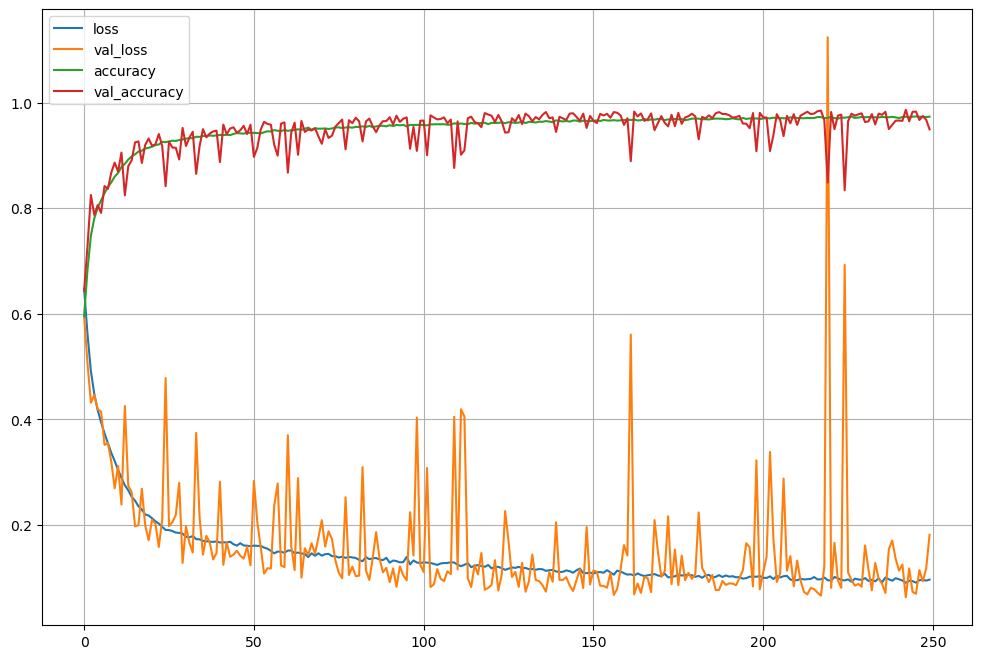

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

262/262 [==============================] - 0s 1ms/step - loss: 0.1810 - accuracy: 0.9494
Accuracy = 0.95


# 4) 성능 테스트

In [ ]:
import numpy as np

cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(max_num_faces=2, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            fls = results.multi_face_landmarks[0]
            point_list = [fls.landmark[46], fls.landmark[53], fls.landmark[52], fls.landmark[55], fls.landmark[65],
                          
                          fls.landmark[276], fls.landmark[283], fls.landmark[282], fls.landmark[295], fls.landmark[285],
                          
                          fls.landmark[130], fls.landmark[160], fls.landmark[158], fls.landmark[133], fls.landmark[153], fls.landmark[144],
                          
                          fls.landmark[359], fls.landmark[387], fls.landmark[385], fls.landmark[362], fls.landmark[380], fls.landmark[373],
                          
                          fls.landmark[168], fls.landmark[6], fls.landmark[195], fls.landmark[4],
                          
                          fls.landmark[61],  fls.landmark[39], fls.landmark[0], fls.landmark[269], fls.landmark[291], fls.landmark[405], fls.landmark[17], fls.landmark[181],

                          fls.landmark[234], fls.landmark[132], fls.landmark[152], fls.landmark[288], fls.landmark[454]]
            
            temp = []
            for i, points in enumerate(point_list):
                temp.append(points.x)
                temp.append(points.y)
                temp.append(points.z)
            temp = np.array(temp).reshape(1, 117)
        
            classes = model.predict(temp)[0]
            cName = "Non-Drowsy"
            if(classes[0] < classes[1]):
                cName = "Drowsy"
            
            image = cv2.flip(image, 1)
            cv2.putText(image, cName, (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (98, 17, 0), 2, cv2.LINE_AA)
            
            cv2.imshow('MediaPipe Face Mesh', image)
            if cv2.waitKey(5) & 0xFF == 27:
                break
                
cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step
